In [7]:
import nltk
from nltk import download

import matplotlib.pyplot as plt
from collections import OrderedDict
import random


download('movie_reviews')
download('punkt')
download('stopwords')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\E10112538\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\E10112538\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\E10112538\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
def wordFilter(excluded, wordrow):
    filtered = [word for word in wordrow if word not in excluded]
    return filtered

stopwords = nltk.corpus.stopwords.words('english')

def lowerCaseArray(wordrow):
    lowercased = [word.lower() for word in wordrow]    
    return lowercased

stemmer = nltk.SnowballStemmer("english")

def wordStemmer(wordrow):
    stemmed = [stemmer.stem(word) for word in wordrow]
    return stemmed

manual_stopwords = [',','.',')',',','(','m',"'m","n't",'e.g',"'ve",'s','#','/','``',"'s","''",'!','r',']','=','[','s','&','%','*','...','1','2','3','4','5','6','7','8','9','10','--',"''",';','-',':', "'", '"']

In [90]:
def data_processing(reviews, manual_stopworks):
    data = {'wordMatrix':[],'all_words':[]}
    interWordMatrix = []
    interWordList = []
    for row in reviews:
        row = lowerCaseArray(row)
        row = wordFilter(stopwords,row)
        row = wordFilter(manual_stopwords,row)#4
        row = wordStemmer(row)
        interWordList.extend(row)#5
        interWordMatrix.append(row)#6

    wordfreqs = nltk.FreqDist(interWordList)#8
    hapaxes = wordfreqs.hapaxes()#9

    for wordvector in interWordMatrix:
        wordvector_nohapexes = wordFilter(hapaxes,wordvector) #10
        data['wordMatrix'].append(wordvector_nohapexes)
        data['all_words'].extend(wordvector_nohapexes)

    return data

In [96]:
from nltk.corpus import movie_reviews

files_pos = movie_reviews.fileids('pos')
files_neg = movie_reviews.fileids('neg')

categories = ['pos', 'neg']
data = {}

for category in categories:
    reviews = [movie_reviews.words(file_id) for file_id in movie_reviews.fileids(category)[0:]]
    data[category] = data_processing(reviews, manual_stopwords)

#print(data['pos'])

In [97]:
print(data['pos']['wordMatrix'][3])

['jaw', 'rare', 'film', 'grab', 'attent', 'show', 'singl', 'imag', 'screen', 'movi', 'open', 'black', 'distant', 'alien', 'like', 'underwat', 'sound', 'come', 'first', 'omin', 'bar', 'compos', 'john', 'william', 'infam', 'score', 'dah', 'director', 'steven', 'spielberg', 'wast', 'time', 'take', 'us', 'water', 'midnight', 'swim', 'beauti', 'girl', 'turn', 'dead', 'right', 'away', 'let', 'us', 'know', 'vulner', 'float', 'ocean', 'jaw', 'attack', 'never', 'relinquish', 'grip', 'perhap', 'outstand', 'jaw', 'spielberg', 'build', 'movi', 'work', 'like', 'theatric', 'product', 'first', 'act', 'second', 'act', 'unlik', 'mani', 'modern', 'filmmak', 'great', 'deal', 'restraint', 'refus', 'show', 'us', 'shark', 'middl', 'second', 'act', 'mere', 'suggest', 'presenc', 'creepi', 'subject', 'underwat', 'shot', 'william', 'music', 'build', 'tension', 'bit', 'bit', 'come', 'time', 'climax', 'shark', 'arriv', 'truli', 'terrifi', 'let', 'us', 'get', 'bore', 'imageri', 'first', 'act', 'open', 'polic', 'ch

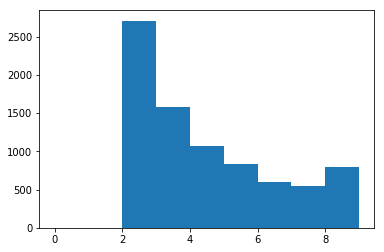

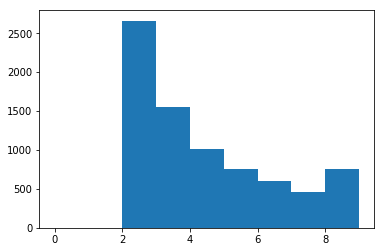

In [98]:
wordfreqs_cat1 = nltk.FreqDist(data['pos']['all_words'])
plt.hist(wordfreqs_cat1.values(), bins = range(10))
plt.show()
wordfreqs_cat2 = nltk.FreqDist(data['neg']['all_words'])
plt.hist(wordfreqs_cat2.values(), bins = range(10))
plt.show()

In [99]:
print (wordfreqs_cat1.hapaxes())
print (wordfreqs_cat2.hapaxes())

[]
[]


In [100]:
print (wordfreqs_cat1.most_common(20))
print (wordfreqs_cat2.most_common(20))

[('film', 6193), ('movi', 3160), ('one', 3155), ('charact', 2066), ('like', 2034), ('make', 1693), ('time', 1606), ('?', 1570), ('get', 1518), ('scene', 1365), ('stori', 1360), ('good', 1285), ('see', 1251), ('play', 1235), ('even', 1207), ('also', 1200), ('well', 1141), ('life', 1057), ('much', 1038), ('way', 1038)]
[('film', 5006), ('movi', 3817), ('one', 2874), ('?', 2201), ('like', 2103), ('charact', 1815), ('get', 1702), ('make', 1550), ('time', 1441), ('even', 1408), ('scene', 1306), ('good', 1191), ('play', 1147), ('bad', 1102), ('would', 1090), ('look', 1053), ('go', 1028), ('much', 1012), ('stori', 985), ('plot', 978)]


In [101]:
def bag_of_words(words):
    bag = {}
    for w in words:
        bag[w] = bag.get(w,0)+1
    return bag

In [102]:
reviews_pos = [(bag_of_words(x), 'pos') for x in data['pos']['wordMatrix']]
reviews_neg = [(bag_of_words(x), 'neg') for x in data['neg']['wordMatrix']]

In [103]:
from random import shuffle

split_pct = .80

def split_set(review_set):
    split = int(len(review_set)*split_pct)
    return (review_set[:split], review_set[split:])

shuffle(reviews_pos)
shuffle(reviews_neg)

pos_train, pos_test = split_set(reviews_pos)
neg_train, neg_test = split_set(reviews_neg)

train_set = pos_train+neg_train
test_set = pos_test+neg_test

In [104]:
from nltk.classify import NaiveBayesClassifier

model = NaiveBayesClassifier.train(train_set)

In [105]:
from nltk.classify.util import accuracy

print(100 * accuracy(model, test_set))

74.5


In [107]:
holdoutLength  = 100
#labeled data
labeled_data1 = [(word,'pos') for word in data['pos']['wordMatrix'][holdoutLength:]]
labeled_data2 = [(word,'neg') for word in data['neg']['wordMatrix'][holdoutLength:]]
labeled_data = []
labeled_data.extend(labeled_data1)
labeled_data.extend(labeled_data2)
#create holdout
holdout_data = data['pos']['wordMatrix'][:holdoutLength]
holdout_data.extend(data['neg']['wordMatrix'][:holdoutLength])
holdout_data_labels = ([('pos') for _ in range(holdoutLength)] + [('neg') for _ in range(holdoutLength)])

In [108]:
print (len(labeled_data))
print (len(holdout_data_labels))
print (labeled_data[20])

1800
200
(['brief', 'best', 'bleak', 'comedi', 'film', 'sinc', 'heather', 'full', 'wonder', 'swipe', 'fifteen', 'minut', 'fame', 'mental', 'feed', 'much', 'modern', 'american', 'pop', 'cultur', 'go', 'see', 'prepar', 'film', 'watch', 'move', 'interview', 'hard', 'copi', 'pam', 'smart', 'new', 'hampshir', 'media', 'teacher', 'convict', 'engin', 'death', 'husband', 'back', '1980', 'hard', 'copi', 'dian', 'diamond', 'ask', 'smart', 'thought', 'nicol', 'kidman', 'fiction', 'portray', 'new', 'film', 'die', 'smart', 'repli', 'thought', 'kidman', 'charact', 'came', 'dumb', 'vicious', 'tramp', 'thought', 'public', 'new', 'movi', 'generat', 'might', 'hurt', 'chanc', 'latest', 'court', 'appeal', 'smart', 'convict', 'given', 'life', 'sentenc', 'part', 'murder', 'husband', 'smart', 'got', 'point', 'first', 'time', 'public', 'took', 'better', 'script', 'well', 'act', 'movi', 'version', 'event', 'absolut', 'truth', 'far', 'less', 'artist', 'real', 'life', 'version', 'howev', 'given', 'choic', 'mass'

In [110]:
data['pos']['all_words_dedup'] = list(OrderedDict.fromkeys(data['pos']['all_words']))
data['neg']['all_words_dedup'] = list(OrderedDict.fromkeys(data['neg']['all_words']))

In [112]:
all_words = []
all_words.extend(data['pos']['all_words_dedup'])
all_words.extend(data['neg']['all_words_dedup'])

In [113]:
all_words_dedup = set(list(OrderedDict.fromkeys(all_words)))

In [114]:
prepared_data = [({word: (word in x[0]) for word in all_words_dedup}, x[1]) for x in labeled_data]
prepared_holdout_data = [({word: (word in x[0]) for word in all_words_dedup}) for x in holdout_data]

In [115]:
random.shuffle(prepared_data)
train_size = int(len(prepared_data) * 0.75)
train = prepared_data[:train_size]
test = prepared_data[train_size:]

In [116]:
classifier  = nltk.NaiveBayesClassifier.train(train)

In [117]:
nltk.classify.accuracy(classifier, test)

0.8533333333333334